In [ ]:
import numpy as np
import seaborn
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

2023-05-25 16:29:32.769291: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 16:29:32.811711: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 16:29:32.812231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 16:29:33.452657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(42)
set_seed(42)

## Классификация

In [3]:
# Загрузка набора данных Iris
iris = load_iris()
X, y = iris.data, iris.target

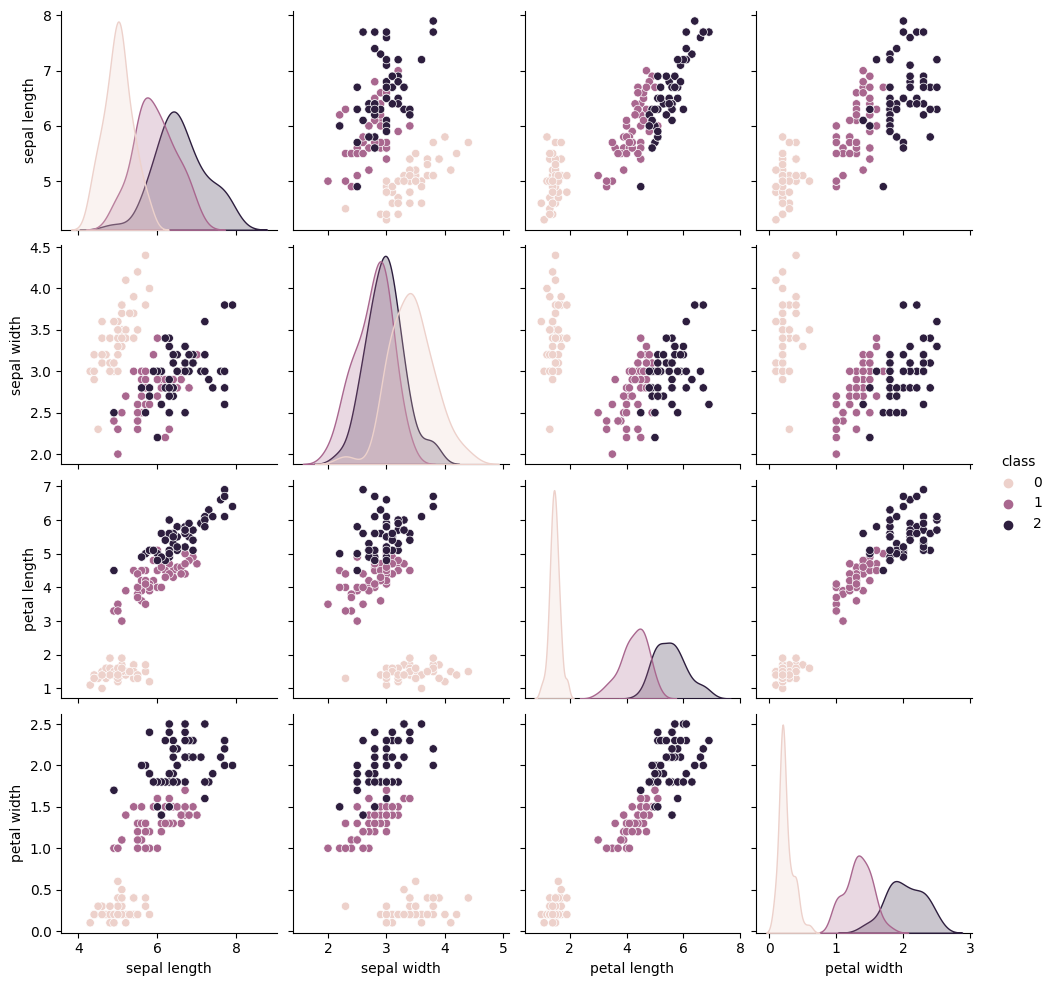

In [4]:
data = pd.DataFrame( X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
data['class'] = y
seaborn.pairplot(data, hue='class')

In [5]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# + сет для валидации
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Преобразование целевых меток в one-hot кодировку
encoder = OneHotEncoder(categories='auto')
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()
y_val = encoder.transform(y_val.reshape(-1, 1)).toarray()

print(f"Train: {X_train.shape[0]:6d}")
print(f"Test:  {X_test.shape[0]:6d}")
print(f"Val:   {X_val.shape[0]:6d}")

Train:    120
Test:      24
Val:        6


### Keras

In [6]:
# Создание модели нейронной сети
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


2023-05-25 16:29:38.307694: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-25 16:29:38.308123: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
# Обучение модели
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, batch_size=2, verbose=1)

Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 1.0547 - accuracy: 0.3417 - val_loss: 0.8910 - val_accuracy: 0.8333
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.9793 - accuracy: 0.5250 - val_loss: 0.8284 - val_accuracy: 0.8333
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.9177 - accuracy: 0.4750 - val_loss: 0.7730 - val_accuracy: 0.8333
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.8628 - accuracy: 0.5083 - val_loss: 0.7209 - val_accuracy: 0.8333
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.8078 - accuracy: 0.4750 - val_loss: 0.7014 - val_accuracy: 0.8333
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.7486 - accuracy: 0.6000 - val_loss: 0.6659 - val_accuracy: 0.8333
Epoch 7/50
60/60 [==============================] - 0s 989us/step - loss: 0.6908 - accuracy: 0.8333 - val_loss: 0.6303 - val_accuracy: 0.8333
Epoch 8/50
60/60 [

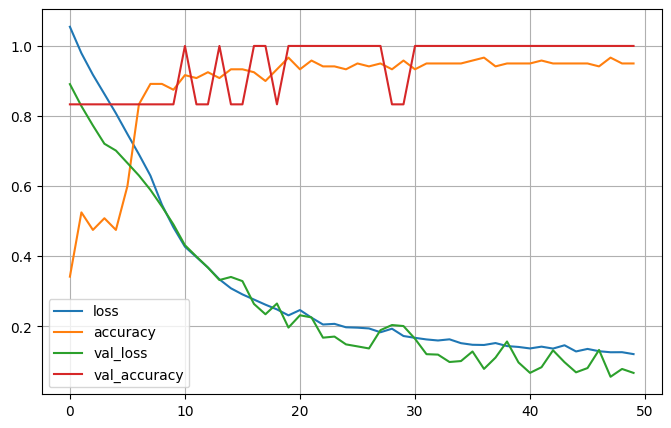

In [8]:
def history_plot(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

history_plot(history)

In [9]:
# Оценка модели на обучающей выборке
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.1141
Test accuracy: 0.9583


In [10]:
# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.0719
Test accuracy: 1.0000


In [11]:
# Оценка модели на валидации 
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.0670
Test accuracy: 1.0000


### Pytorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary 
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
# Создание пользовательского датасета PyTorch
class IrisDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return len(self.features)

In [15]:
# Создание модели нейронной сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

In [16]:
# Создание экземпляров датасета и загрузчиков данных
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)
val_dataset = IrisDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
val_laoder = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [17]:
# Создание модели и оптимизатора
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Обучение модели
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()    

# Оценка модели на тестовой выборке
model.eval()
total_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_loss += criterion(outputs, labels).item()
        total += labels.size(0)
        correct += (predicted == torch.max(labels, 1)[1]).sum().item()                
        

accuracy = correct / total
avg_loss = total_loss / len(test_loader)
print(f'Test loss: {avg_loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Test loss: 0.1239
Test accuracy: 1.0000


In [18]:
# Функция для получения предсказанных меток
def get_predicted_labels(outputs):
    _, predicted = torch.max(outputs.data, 1)
    return predicted.numpy()

# Функция для получения фактических меток
def get_true_labels(labels):
    return np.argmax(labels, axis=1)

# Оценка модели на тестовой выборке
model.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_labels.extend(get_predicted_labels(outputs))
        true_labels.extend(get_true_labels(labels.numpy()))

# Отчет о классификации
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [19]:
model.to(device)
summary(model, (4,))
print(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              50
              ReLU-2                   [-1, 10]               0
            Linear-3                   [-1, 10]             110
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 3]              33
           Softmax-6                    [-1, 3]               0
Total params: 193
Trainable params: 193
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
Net(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=T

## Регрессия

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.discriminant_analysis import StandardScaler

# Загрузка набора данных california_housing
boston = fetch_california_housing()
X, y = boston.data, boston.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Keras

In [31]:
# Создание модели нейронной сети
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),    
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Обучение модели
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=1000, batch_size=X_train.shape[0], verbose=0)

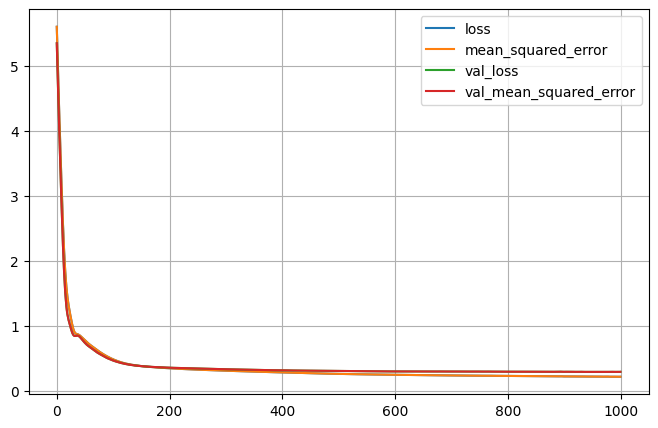

In [33]:
history_plot(history)

In [34]:
# Оценка модели 
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test MSE: {mse:.4f}')

Test loss: 0.2758
Test MSE: 0.2758


### Pytorch

In [ ]:
# Преобразование данных в тензоры PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [47]:
# Определение модели нейронной сети
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x


model = RegressionModel(X_train.shape[1])

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Обучение модели
num_epochs = 2000
batch_size = X_train.shape[0] 
for epoch in range(num_epochs):    
    indices = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        batch_indices = indices[i:i+batch_size]
        batch_inputs = X_train[batch_indices]
        batch_targets = y_train[batch_indices]

        optimizer.zero_grad()
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/2000], Loss: 0.3485
Epoch [200/2000], Loss: 0.2810
Epoch [300/2000], Loss: 0.2522
Epoch [400/2000], Loss: 0.2357
Epoch [500/2000], Loss: 0.2227
Epoch [600/2000], Loss: 0.2077
Epoch [700/2000], Loss: 0.2021
Epoch [800/2000], Loss: 0.2096
Epoch [900/2000], Loss: 0.1974
Epoch [1000/2000], Loss: 0.1833
Epoch [1100/2000], Loss: 0.1826
Epoch [1200/2000], Loss: 0.1737
Epoch [1300/2000], Loss: 0.1746
Epoch [1400/2000], Loss: 0.1674
Epoch [1500/2000], Loss: 0.1712
Epoch [1600/2000], Loss: 0.1717
Epoch [1700/2000], Loss: 0.1839
Epoch [1800/2000], Loss: 0.1827
Epoch [1900/2000], Loss: 0.1547
Epoch [2000/2000], Loss: 0.1579


In [48]:
# Оценка модели на тестовой выборке
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
print(f'Test loss (MSE): {test_loss.item():.4f}')

Test loss (MSE): 0.2838
